# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Load Data (dari processed)

In [2]:
PROCESSED_DIR = Path("../data/processed")
df = pd.read_csv(PROCESSED_DIR / "electricity_clean.csv")

df.head()

,province,electricity_gwh,year
0,Aceh,2937.99,2020
1,Bali,4946.86,2020
2,Banten,22268.71,2020
3,Bengkulu,1013.50,2020
4,Di Yogyakarta,3012.45,2020


# Style untuk Dashboard

In [3]:
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "axes.titlepad": 15,
        "figure.figsize": (10, 5)
    }
)

# Helper Export Function (PNG untuk Streamlit jika diperlukan)

In [4]:
import os

EXPORT_DIR = Path("../streamlit_app/assets/charts")
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

def export_fig(name: str):
    """
    Export current matplotlib figure to PNG for Streamlit usage.
    """
    path = EXPORT_DIR / f"{name}.png"
    plt.savefig(path, bbox_inches="tight", dpi=150)
    print(f"Exported: {path}")

# Bar Chart: Top Provinces (untuk halaman Overview)

Exported: ..\streamlit_app\assets\charts\top10_province_avg.png


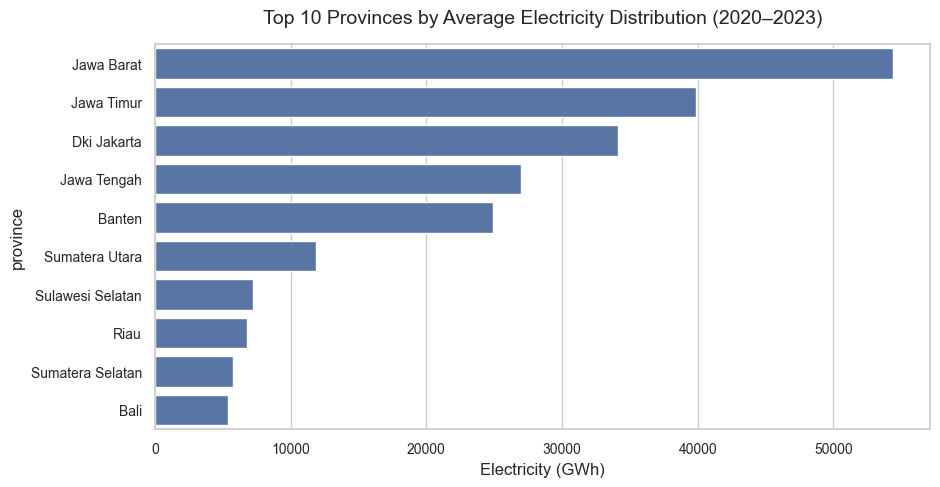

In [5]:
top_prov = (
    df.groupby("province")["electricity_gwh"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_prov.values, y=top_prov.index)
plt.title("Top 10 Provinces by Average Electricity Distribution (2020–2023)")
plt.xlabel("Electricity (GWh)")

export_fig("top10_province_avg")
plt.show()

# Line Chart: National Trend

Exported: ..\streamlit_app\assets\charts\national_trend.png


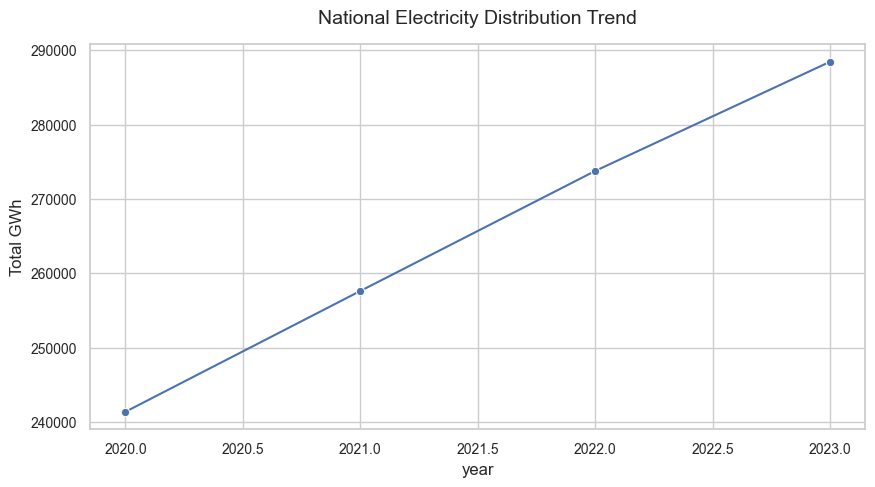

In [6]:
national = df.groupby("year")["electricity_gwh"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=national.index, y=national.values, marker="o")
plt.title("National Electricity Distribution Trend")
plt.ylabel("Total GWh")

export_fig("national_trend")
plt.show()

# Heatmap: Province vs Year

Exported: ..\streamlit_app\assets\charts\province_year_heatmap.png


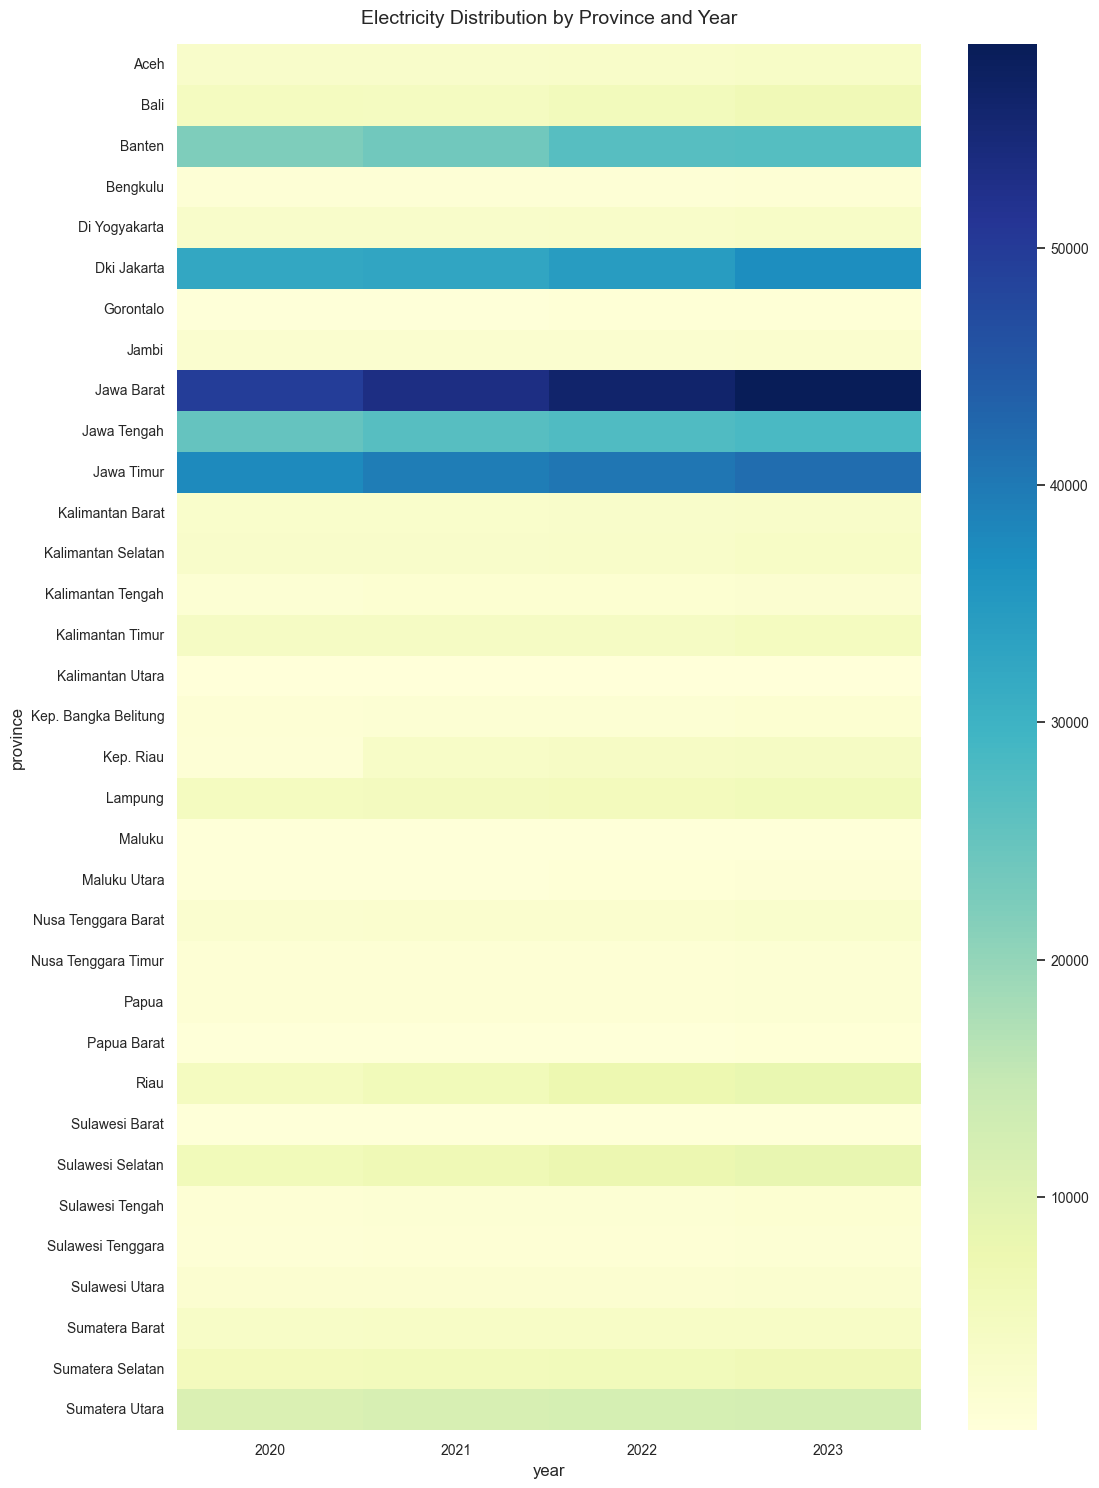

In [7]:
pivot = df.pivot(index="province", columns="year", values="electricity_gwh")

plt.figure(figsize=(12,18))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Electricity Distribution by Province and Year")

export_fig("province_year_heatmap")
plt.show()

# Trend per Province

Exported: ..\streamlit_app\assets\charts\province_trends_all.png


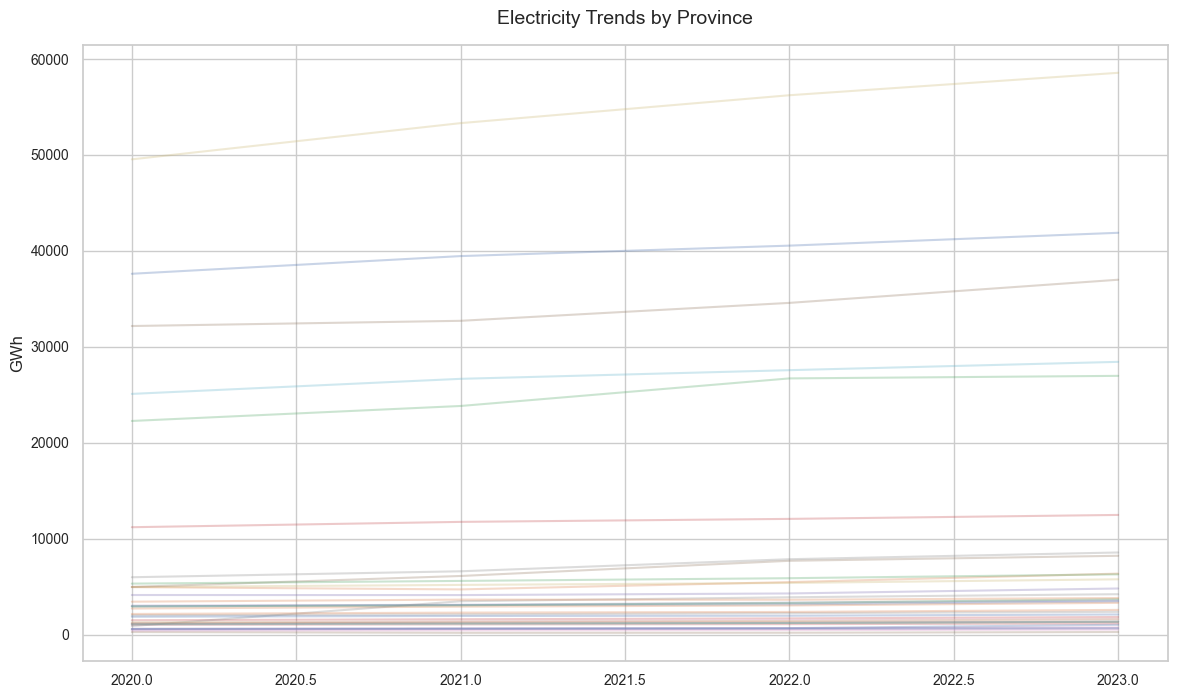

In [8]:
plt.figure(figsize=(14,8))

for prov in df["province"].unique():
    subset = df[df["province"] == prov]
    plt.plot(subset["year"], subset["electricity_gwh"], alpha=0.3)

plt.title("Electricity Trends by Province")
plt.ylabel("GWh")

export_fig("province_trends_all")
plt.show()

# Province Comparison

Exported: ..\streamlit_app\assets\charts\example_trend_jawa_barat.png


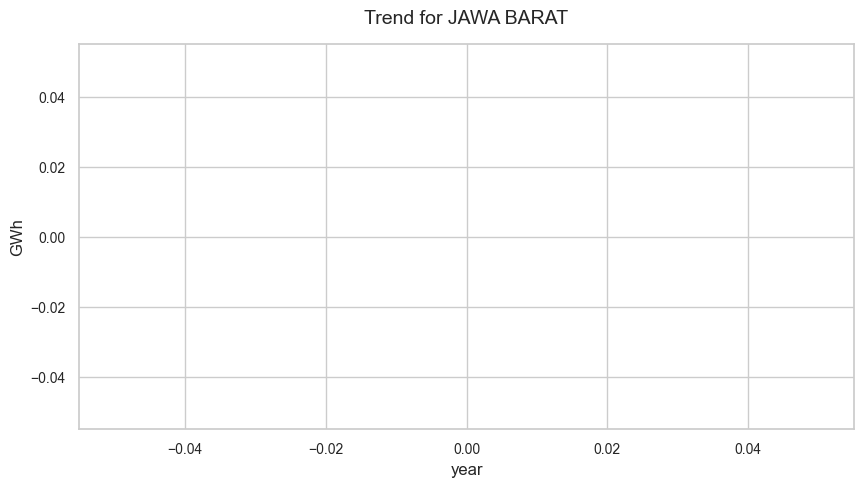

In [9]:
example_province = "JAWA BARAT"
subset = df[df["province"] == example_province]

plt.figure(figsize=(10,5))
sns.lineplot(x="year", y="electricity_gwh", data=subset, marker="o")
plt.title(f"Trend for {example_province}")
plt.ylabel("GWh")

export_fig("example_trend_jawa_barat")
plt.show()